# Forelesning 3: Statistisk analyse
I denne forelesningen skal vi se på datahåndtering og hvordan vi kan bruke data til å lage modeller.
- gjøre statistiske operasjoner på data (pandas og numpy)
- tolke statistiske størrelser og visualiseringer (som boksplott)
- gjøre og tolke regresjon (numpy)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Statistikk
- Interkvartilbredde.
- Gjennomsnitt.
- Varians ($\sigma^2$) og standardavvik ($\sigma$):

$$\sigma^2  = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$$

$$\sigma  = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$$

In [10]:
import numpy as np
import statistics as st

konsentrasjon = [2.00, 3.00, 3.03, 4.01, 4.00, 4.01, 5.00]

snitt = np.mean(konsentrasjon)
med = np.median(konsentrasjon)
typetall = st.mode(konsentrasjon)
#avvik = np.std(konsentrasjon, ddof = 1)

print(snitt, med, typetall)

3.5785714285714283 4.0 4.01


In [2]:
import pandas as pd

df = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/datafiler/penguings.txt")

In [16]:
luffelengde = df["flipper_length_mm"]
ll_snitt = luffelengde.mean()
ll_median = luffelengde.median()
#luffelengde.std() # Standard ddof = 1 (deler på n - 1, i motsetning til np.std)

print(ll_snitt, ll_median)

200.91520467836258 197.0


In [22]:
Q1, Q2, Q3 = luffelengde.quantile([0.25, 0.5, 0.75])

In [23]:
IQR = Q3 - Q1
print(IQR)

23.0


In [ ]:
konsentrasjon = [-5, 2, 3, 3, 4, 4, 4, 5, 5, 7, 9]
kons = pd.Series(konsentrasjon)
Q1, Q2, Q3 = kons.quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1

uteliggere = kons[(kons >= (Q3 + 1.5*IQR)) | (kons <= (Q1 - 1.5*IQR))]
kons.drop(index=uteliggere.index, inplace=True)

kons

In [ ]:
korrelasjon = df.corr(numeric_only=True)
sns.heatmap(korrelasjon, annot = True)

In [19]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot: >

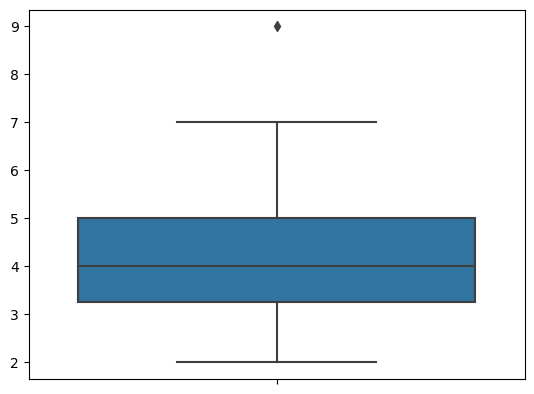

In [26]:
import seaborn as sns
# Boksplott
konsentrasjon = [2, 3, 3, 4, 4, 4, 5, 5, 7, 9]
sns.boxplot(y=konsentrasjon)

## Regresjon

|     Temperatur (°C)     |     NH3, løselighet     (g/100 mL H$_2$O)     |     NaCl, Løselighet      (g/100 mL H$_2$O)     |
|-------------------------|--------------------------------------------|----------------------------------------------|
|     0                   |     88.5                                   |     35.7                                     |
|     20                  |     56.0                                   |     35.9                                     |
|     40                  |     34.0                                   |     36.4                                     |
|     60                  |     20.0                                   |     37.1                                     |
|     80                  |     11.0                                   |     38.0                                     |
|     100                 |     7.0                                    |     39.2                                     |

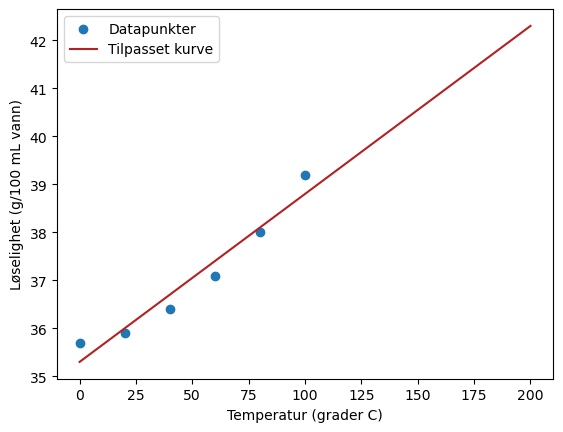

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# La oss gjøre en regresjon
T = [0,20,40,60,80,100]
sol_NaCl = [35.7, 35.9, 36.4, 37.1, 38, 39.2]

reg = np.polyfit(T, sol_NaCl, 1)
x = np.linspace(0,200,1000)

def modell(x):
    return reg[0]*x + reg[1]
    
y = modell(x)

x2 = np.array(T)
y2 = modell(x2)
#y = np.polyval(reg, x) # reg[0]*x**5 + reg[1]*x**4 + ...

plt.scatter(T, sol_NaCl, label="Datapunkter")
plt.plot(x, y, label="Tilpasset kurve", color ="firebrick")
plt.xlabel("Temperatur (grader C)")
plt.ylabel("Løselighet (g/100 mL vann)")
plt.legend()
plt.show()

In [48]:
reg

array([3.50e-02, 3.53e+01])

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(sol_NaCl, y2)
R2

Menti: https://www.menti.com/2sikjeo4ga